# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [50]:
import numpy as np #for mathematical functions
import matplotlib.pyplot as plt #for graphs etc
import pandas as pd #to work with dataset

### Importing the training set

In [51]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')#importing the training csv file
#We are just taking the open column to train and predict the future trend in open column
training_set=dataset_train.iloc[:,1:2].values

In [52]:
print(dataset_train)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]


In [53]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler #importing MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1)) #with the normalization term, all value will be between 0 and 1
training_set_scaled=sc.fit_transform(training_set) #Using fit_transform will fit(will get access to min(x) and max(x) of the formula) and transform (scale) it


In [55]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [56]:
X_train=[]
y_train=[]
for i in range(60,1258):# we have 1257 data in the csv file
    X_train.append(training_set_scaled[i-60:i,0]) #format [row, column]
    y_train.append(training_set_scaled[i,0])
#converting X_train and y_train list to numpy arrays
X_train,y_train=np.array(X_train),np.array(y_train)



In [57]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [58]:
#print(y_train)
print(X_train.shape)


(1198, 60)


### Reshaping

In [59]:
#We will reshape the X_train to add more dimentionality and add more indicators.
X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))


In [60]:
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [74]:
from keras.models import Sequential #it will have sequential layers
from keras.layers import Dense #for output layer
from keras.layers import LSTM #for lstm layers
from keras.layers import Dropout #some dropout regularization to avoid overfitting

### Initialising the RNN

In [75]:
regressor = Sequential() #an object of the sequential class

### Adding the first LSTM layer and some Dropout regularisation

In [76]:
#Adding LSTM Layer
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
#dropout regularization
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [64]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [65]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [66]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [77]:
regressor.add(Dense(units = 1)) #for output layer we use Dense class with 1 neurons

### Compiling the RNN

In [78]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') #optimizer and loss function

### Fitting the RNN to the Training set

In [80]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32) #inputs X, input Y, number of epochs (How many time you want to hold the data for forward propapgation and backward), batch_size (after every 32 stock prices, it will back propagate)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1938
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0962
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0821
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0811
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0818
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0818
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0785
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0828
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0789
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0780
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0809
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0751
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0745
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0741
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - lo

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [70]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [81]:
#Dataset conatenated training and test data
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
#taking inputs of 60 previous days
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
#reshaping
inputs=inputs.reshape(-1,1)
#scaling [We will use the same sclaing object we created earlier ;sc= MinMaxScaler(feature_range=(0,1))]
inputs=sc.transform(inputs)


### Visualising the results

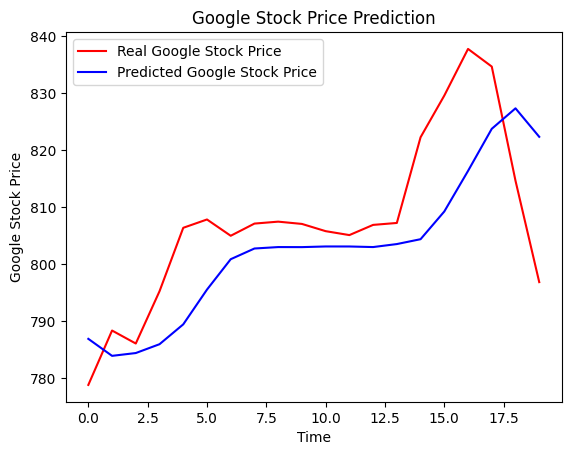

In [82]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Read this blog : [Blog](https://mitul-shahriyar.hashnode.dev/machine-learning-deep-learning-rnn-part-28)